# Data

In [ ]:
%tensorflow_version 1.x
import tensorflow 
tensorflow.__version__

'1.15.2'

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

!pip install vaderSentiment
import vaderSentiment as vs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
workdir_path = '/content/drive/MyDrive/TCC_MBA_PUC/'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# create a csv reader to inspect data
reader = pd.read_csv('./Bitcoin_tweets.csv')


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-12ac17089046>", line 2, in <module>
    reader = pd.read_csv('./Bitcoin_tweets.csv')
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 688, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 460, in _read
    data = parser.read(nrows)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 1198, in read
    ret = self._engine.read(nrows)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 2157, in read
    data = self._reader.read(nrows)
  File "pandas/_libs/parsers.pyx", line 847, in pandas._libs.parsers.TextReader.read
  File "pandas/_libs/parsers.pyx", line 862, in pandas._libs.parsers.TextReader._read_low_memory
  File "pan

KeyboardInterrupt: ignored

# Exploratory Data Analysis

In [ ]:
# base dimension
reader.shape

(1999534, 13)

In [ ]:
# firsts lines view
reader.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [ ]:
# identify num values
reader.isnull().sum()

user_name               29
user_location       964510
user_description    237186
user_created             0
user_followers           0
user_friends             0
user_favourites          0
user_verified            0
date                     0
text                     0
hashtags             16974
source                3542
is_retweet             228
dtype: int64

In [ ]:
# understand 'hastagas' column
reader['hashtags'].value_counts()

['Bitcoin']                                                                                                                                                                                                                                                                            288579
['bitcoin']                                                                                                                                                                                                                                                                            115721
['BTC']                                                                                                                                                                                                                                                                                 67239
['btc']                                                                                                                                       

In [ ]:
# inspect type data
reader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999534 entries, 0 to 1999533
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        object 
dtypes: float64(1), object(12)
memory usage: 198.3+ MB


In [ ]:
# Understand 'user_description' column
reader['user_description'].value_counts()

The most advanced #BTC bitcoin tracker and analytics system reporting large and interesting transactions as they happen.                                                11439
Fearless like a Honey Badger... Bears or Bulls not important we will fight This signals only testing... #DYOR, #YTD Telegram: https://t.co/9fgWpWZqbj                   10749
#Bitcoin                                                                                                                                                                10390
#bitcoin                                                                                                                                                                10251
Breaking News. Bitcoin, Blockchain & Beyond. #bitcoin #blockchain #ethereum #cryptocurrency #crypto #trading #TA #charts $btc $eth                                       7926
                                                                                                                                  

After inspection create data base to sentiment analyse

1) hashtags column as well as user_name, 
user_location, 
user_description, 
user_created, 
user_followers, 
user_friends, 
user_favourites, 
user_verified, 
source and is_retweet columns shall be removed due to no interesting information

2) data column shall be tretement because is target as object



In [ ]:
# Inspect 'source' column
print(reader['source'].str.contains('bot').value_counts());
print('#=#=#=#=#=#=#=', '\n')
reader['source'].value_counts()

False    1987838
True        8154
Name: source, dtype: int64
#=#=#=#=#=#=#= 



Twitter for Android            575197
Twitter Web App                524412
Twitter for iPhone             391904
IFTTT                           30944
dlvr.it                         26063
                                ...  
VariantTweetPost                    1
Twitter Search - Jenn Proos         1
TalkBasket                          1
TopHashtags                         1
MickeyBlog.com Updates              1
Name: source, Length: 1648, dtype: int64

In [ ]:
reader.loc[1489541]

user_name                                            Mempool Whales 🐋
user_location                                                 Mempool
user_description    I'm hunting whales in the #bitcoin mempool.\nF...
user_created                                      2021-03-31 21:03:05
user_followers                                                    910
user_friends                                                       62
user_favourites                                                   509
user_verified                                                   False
date                                              2021-10-29 23:55:06
text                🐋🐋🐋🐋🐋🐋\n6992 #BTC (244.543.864 USD) will be tr...
hashtags                                           ['BTC', 'bitcoin']
source                                                     mempoolBot
is_retweet                                                      False
Name: 1489541, dtype: object

In [ ]:
reader['text'].loc[1489541]

'🐋🐋🐋🐋🐋🐋\n6992 #BTC (244.543.864 USD) will be transfered from unknown wallet to unknown address (never used before)\n\nhttps://t.co/TpAQqFGIUb\n#bitcoin'

In [ ]:
reader['user_description'].str.contains('hunting').value_counts()

False    1759281
True        3067
Name: user_description, dtype: int64

In [ ]:
reader['user_description'].str.contains('cryptobot').value_counts()

False    1762323
True          25
Name: user_description, dtype: int64

In [ ]:
teste = reader.drop(reader['user_description'].str.contains('cryptobot').value_counts())#==False)
teste

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999529,Oleg,NaN,https://t.co/1TtQwV1vwA,2011-11-23 16:10:16,529.0,42,155,False,2021-12-29 19:53:40,OlegBarca's Stream №547! Live in few mins!\n\n...,"['stake', 'gambling', 'casino', 'btc']",Twitter Web App,False
1999530,Michael Scott 🟩,Pennsylvania,I love inside jokes. I hope to be a part of on...,2011-12-01 16:24:40,1117.0,47,537,False,2021-12-29 19:53:36,Crypto: MistToken\nSymbol: #MistSwap \nMistSwa...,"['MistSwap', 'BCH', 'SmartBCH', 'Blockchain', ...",Twitter Web App,False
1999531,Alan,NaN,"New journey , learning to trade 📈📉. Crypto & S...",2020-11-27 11:57:34,26.0,336,1102,False,2021-12-29 19:53:33,"Just 🔒 for 3x , what about you ? \n\n@AccelDef...","['btc', 'accel', 'Ethereum', 'Crypto', 'Crypto...",Twitter for iPhone,False
1999532,Inari gr,NaN,NaN,2021-11-17 03:13:48,67.0,415,3798,False,2021-12-29 19:53:31,@Bitboy_Crypto A $Inari Trailer Video has been...,"['P2EGaming', 'sandbox', 'Mana', 'BTC', 'ETH',...",Twitter Web App,False


In [ ]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999532 entries, 0 to 1999533
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        object 
dtypes: float64(1), object(12)
memory usage: 213.6+ MB


In [ ]:
df_full = reader.drop(columns = [ 'hashtags', 
                               'user_location', 
                               'user_name',
                               'user_description', 
                               'user_created', 
                               'user_followers', 
                               'user_friends', 
                               'user_favourites', 
                               'user_verified', 
                               'source', 'is_retweet'])
df_full.head(5)

,date,text
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


In [ ]:
df_full.shape

(1999534, 2)

In [ ]:
# Initially miminaze data frame dimension in a sense to facilitate make quick investigations and operation. 
# After script finished the pipelini will be run on full data base

df=df_full#[0:200]
print(df.shape)
df.head(5)


(1999534, 2)


,date,text
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


In [ ]:
# Inspection text length and create column
df['text_length'] = df['text'].apply(len)
df[['date','text_length','text']].head()

,date,text_length,text
0,2021-02-10 23:59:04,135,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10 23:58:48,140,"😎 Today, that's this #Thursday, we will do a ""..."
2,2021-02-10 23:54:48,136,"Guys evening, I have read this article about B..."
3,2021-02-10 23:54:33,94,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10 23:54:06,140,This network is secured by 9 508 nodes as of t...


In [ ]:
# Identify minimum and maximum text lenght
df['text_length'].describe()

count    1.999534e+06
mean     1.821057e+02
std      8.196424e+01
min      9.000000e+00
25%      1.170000e+02
50%      1.810000e+02
75%      2.570000e+02
max      9.690000e+02
Name: text_length, dtype: float64

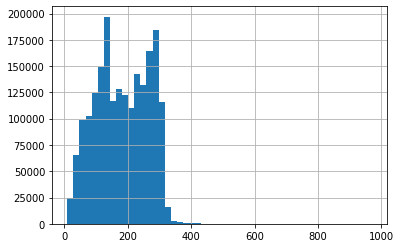

In [ ]:
# quantify text lenght
df['text_length'].hist(bins=50)

# Pre processing data

RegEx documentation: [RegEx (Regular Expression)](https://docs.python.org/3/library/re.html):

RegEx application: https://amitness.com/regex/


In [ ]:
!pip install unidecode

import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from unidecode import unidecode
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from wordcloud import WordCloud


     |████████████████████████████████| 235 kB 5.2 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#pipeline - text pre-treatment
def processtext(text, stemmer, stopwords=nltk.corpus.stopwords.words('english')):
  ###
  # remove accentuation
  text = unidecode(text)
  ###
  #Convert www.* or https?://* to URL
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',text)
  # Remove Numbers
  text = re.sub(r'\d', '', text)
  ###
  #Convert @username to AT_USER
  text = re.sub('@[^\s]+','AT_USER',text)
  ###
  # Remove Special Characters
  text = re.sub(r"[^a-zA-Z0-9]+", ' ', text)
  ###
  # Lowercase words
  text = text.lower()
  ###
  # Word Tokenize
  words = word_tokenize(text)
  ###
  # Remove Stopwords
  filtered_words = []
  for w in words:
    if w not in stopwords:
      filtered_words.append(w)
  ###
  # Stemming Words
  stem_words = []
  for w in filtered_words:
    s_words = stemmer.stem(w)
    stem_words.append(s_words)
  ###
#  # Lemmatizing Words
#  lema_words = []
#  for w in filtered_words:
#      l_words = lemmatizer.lemmatize(w)
#      lema_words.append(l_words)
  ###
#end
  return stem_words

In [ ]:
# define Text Normalization
stemmer = PorterStemmer()
#lemmatizer = WordNetLemmatizer()

# Call pipeline function to pre processing text and insert in a new column
df["filtered_words"] = df['text'].apply(lambda x: processtext(x, stemmer))

# for each string join the words in a new column
#df['join_words'] = df['filtered_words'].apply(lambda x: ' '.join(x))

In [ ]:
df.head(5)

,date,text,text_length,filtered_words
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,135,"[blue, ridg, bank, share, halt, nyse, bitcoin,..."
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",140,"[today, thursday, take, friend, user, btc, wal..."
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",136,"[guy, even, read, articl, btc, would, like, sh..."
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,94,"[btc, big, chanc, billion, price, bitcoin, fx,..."
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,140,"[network, secur, node, today, soon, biggest, b..."


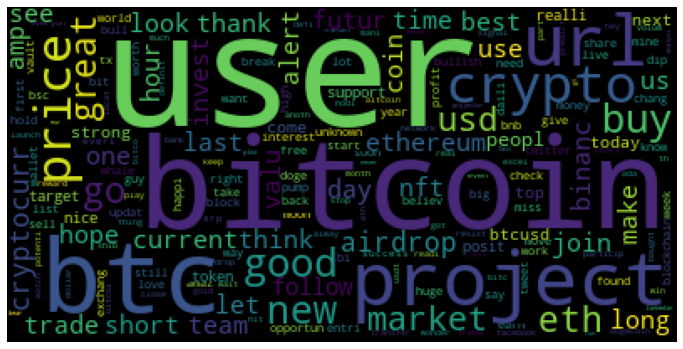

In [ ]:
# build word cloud

text = df['filtered_words'].to_string()#.lower()    
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Sentiment Intensity Analyse (VADER)
VADER means Valence Aware Dictionary and sEntiment Reasoner


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#pipeline - Sentiment Intensity Analyse treatment (VADER)

def unlist(list):
    words=''
    for item in list:
        words+=item+' '
    return words

def compute_vader_scores(df, label):
    #classification = 0
    sid = SentimentIntensityAnalyzer()
    df["vader_neg(%)"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neg"]*100)
    df["vader_neu(%)"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neu"]*100)
    df["vader_pos(%)"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["pos"]*100)
    df["vader_comp(%)"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["compound"]*100)
    # decide sentiment as positive, negative and neutral
    #if df["vader_comp(%)"] >= 0.05 :
     #   classification = ['positive']
    #elif df["vader_comp(%)"] <= - 0.05 :
     #   classification = ['negative']
    #else :
     #   classification = ['neutral']
    #df['Sentiment'] = classification #df[label].apply(lambda x: unlist(x))
    return df

In [ ]:
df.head(5)

,date,text,text_length,filtered_words
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,135,"[blue, ridg, bank, share, halt, nyse, bitcoin,..."
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",140,"[today, thursday, take, friend, user, btc, wal..."
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",136,"[guy, even, read, articl, btc, would, like, sh..."
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,94,"[btc, big, chanc, billion, price, bitcoin, fx,..."
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,140,"[network, secur, node, today, soon, biggest, b..."


In [ ]:
# Data frame with vade sentiment analysis
compute_vader_scores(df,'filtered_words')

,date,text,text_length,filtered_words,vader_neg(%),vader_neu(%),vader_pos(%),vader_comp(%)
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,135,"[blue, ridg, bank, share, halt, nyse, bitcoin,...",0.0,83.3,16.7,29.60
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",140,"[today, thursday, take, friend, user, btc, wal...",0.0,73.8,26.2,49.39
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",136,"[guy, even, read, articl, btc, would, like, sh...",0.0,63.0,37.0,57.19
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,94,"[btc, big, chanc, billion, price, bitcoin, fx,...",0.0,100.0,0.0,0.00
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,140,"[network, secur, node, today, soon, biggest, b...",24.1,75.9,0.0,-54.23
...,...,...,...,...,...,...,...,...
1999529,2021-12-29 19:53:40,OlegBarca's Stream №547! Live in few mins!\n\n...,199,"[olegbarca, stream, live, min, hunt, level, pr...",0.0,74.9,25.1,69.08
1999530,2021-12-29 19:53:36,Crypto: MistToken\nSymbol: #MistSwap \nMistSwa...,301,"[crypto, misttoken, symbol, mistswap, mistswap...",0.0,100.0,0.0,0.00
1999531,2021-12-29 19:53:33,"Just 🔒 for 3x , what about you ? \n\n@AccelDef...",187,"[x, user, launch, soon, btc, accel, ethereum, ...",0.0,100.0,0.0,0.00
1999532,2021-12-29 19:53:31,@Bitboy_Crypto A $Inari Trailer Video has been...,315,"[user, inari, trailer, video, releas, user, bu...",0.0,100.0,0.0,0.00


In [ ]:
df["vader_comp(%)"].value_counts()

 0.00     742911
 44.04     63198
 36.12     52203
 29.60     42472
 63.69     31272
           ...  
 87.98         1
 48.17         1
-8.87          1
 62.09         1
 93.94         1
Name: vader_comp(%), Length: 5352, dtype: int64

In [ ]:
#plt.figure(figsize=(28, 8))
#sns.countplot(df["vader_comp(%)"])

In [ ]:
df["vader_comp(%)"].describe()

count    1.999534e+06
mean     2.241547e+01
std      3.996552e+01
min     -9.894000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      5.574000e+01
max      9.953000e+01
Name: vader_comp(%), dtype: float64

In [ ]:
df["vader_neg(%)"].describe()

count    1.999534e+06
mean     3.698444e+00
std      8.797774e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.750000e+01
Name: vader_neg(%), dtype: float64

In [ ]:
df["vader_pos(%)"].describe()

count    1.999534e+06
mean     1.285805e+01
std      1.502272e+01
min      0.000000e+00
25%      0.000000e+00
50%      8.700000e+00
75%      2.270000e+01
max      9.390000e+01
Name: vader_pos(%), dtype: float64

In [ ]:
df["vader_neu(%)"].describe()

count    1.999534e+06
mean     8.344307e+01
std      1.647263e+01
min      2.500000e+00
25%      7.170000e+01
50%      8.550000e+01
75%      1.000000e+02
max      1.000000e+02
Name: vader_neu(%), dtype: float64

In [ ]:
#classification=[]

#set sentiments values:
# defined according to paper:https://www.analyticsvidhya.com/blog/2021/06/vader-for-sentiment-analysis/
pos = 0.05
neg = -0.05

#index 01:

class0=[]
for i in range(len(df)):
    if df.loc[i,'vader_comp(%)']>= pos:
        class0+=['positive']
    elif df.loc[i,'vader_comp(%)']<= neg:
        class0+=['negative']        
    else:
        class0+=['neutral']  

df['Sentiment']=class0
df['Sentiment'].value_counts()



positive    989549
neutral     742911
negative    267074
Name: Sentiment, dtype: int64

In [ ]:
df.head(5)

,date,text,text_length,filtered_words,vader_neg(%),vader_neu(%),vader_pos(%),vader_comp(%),Sentiment
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,135,"[blue, ridg, bank, share, halt, nyse, bitcoin,...",0.0,83.3,16.7,29.60,positive
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",140,"[today, thursday, take, friend, user, btc, wal...",0.0,73.8,26.2,49.39,positive
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",136,"[guy, even, read, articl, btc, would, like, sh...",0.0,63.0,37.0,57.19,positive
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,94,"[btc, big, chanc, billion, price, bitcoin, fx,...",0.0,100.0,0.0,0.00,neutral
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,140,"[network, secur, node, today, soon, biggest, b...",24.1,75.9,0.0,-54.23,negative


In [ ]:
#No necessary two classifications functions. Moreover, the before is simplest
# index 02

#def classification(num):
#  for i in range(len(df)):
#    if df.loc[i,'vader_comp(%)'] >= pos:
#      classification = ['positivo']
#    elif df.loc[i,'vader_comp(%)'] <= neg:
#      classification = ['negativo']       
#    else:
#      classification = ['neutro']
    #print(i, classification)
#    return classification
  
#def sentiment(df, label):
  #for x in range(len(df)):
#  print(df.loc[i,label])
#  df["Sentiment"] = df[label].apply(lambda x: classification(x))
#  return df

In [ ]:
#sentiment(df,'vader_comp(%)')

In [ ]:
#df['Sentiment'].value_counts()

positive    989549
neutral     742911
negative    267074
Name: Sentiment, dtype: int64


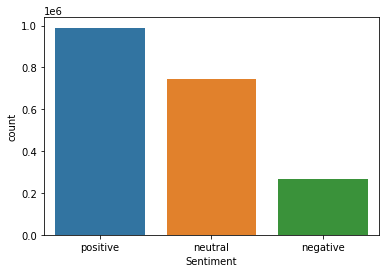

In [ ]:
print(df["Sentiment"].value_counts())
sns.countplot(df['Sentiment']) 

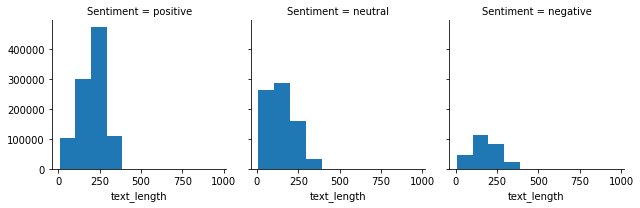

In [ ]:
g = sns.FacetGrid(df,col='Sentiment')
g.map(plt.hist,'text_length')

In [ ]:
#create a file to inspect data classified by Vader with other script
df.to_csv('tweet_formated')